# Pymaceuticals Inc.
---

### Analysis

This study shows that:\
1- *Chart 1* shows that <ins>Capomulin</ins> and <ins>Ramicane</ins> are the most two drug regimens have been given to mice whenever <ins>Propriva</ins> is the least one given to mice.

2- *Chart 2* shows that <ins>male</ins> mice outnumber <ins>female</ins> mice but at very low margin (0.8%).

3- *According to box plot* we notice that <ins>Capomulin</ins> and <ins>Ramicane</ins> are more effective than <ins>Infubinol</ins> and <ins>Ceftamin</ins>, thus we notice that <ins>Capomulin</ins> and <ins>Ramicane</ins> showed better effecacy on reducing tumor volume, <ins>Ramicane</ins> is even better.

4- *According to mouse id l509 progress* we notice that <ins>Capomulin</ins> effecacy started working after roughly 20 days and reducedtumor volume from 48 mm^3 to 41 mm^3 approximately.

5- *Chart 5* illustrates that there is a positive relationship between <ins>average tumor volume</ins> and <ins>weight</ins> per mouse.
So the heavier the mouse is the bigger the tumor volume is on average.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head(10)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
5     s508     Ramicane    Male           1          17
6     f966    Capomulin    Male          16          17
7     m546     Ramicane    Male          18          16
8     z578     Ramicane    Male          11          16
9     j913     Ramicane  Female           4          17

In [2]:
mouse_metadata.shape

(249, 5)

In [3]:
study_results.head(10)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
5     h246          0                45.0                 0
6     p189          0                45.0                 0
7     n923          0                45.0                 0
8     q119          0                45.0                 0
9     f993          0                45.0                 0

In [4]:
study_results.shape

(1893, 4)

In [5]:
# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="outer")

# Display the data table for preview
merged_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [6]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merged_data.loc[merged_data.duplicated(subset=["Mouse ID","Timepoint"], keep=False),:]
duplicate_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26  
865  Female          21          26  
866  Female          21          26  
867  Female          21          26  
868  Female          21          26  
869  Female          21          26

In [8]:
duplicate_mice = duplicate_data["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26  
865  Female          21          26  
866  Female          21          26  
867  Female          21          26  
868  Female          21          26  
869  Female          21          26

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.loc[merged_data["Mouse ID"] != "g989", :]
clean_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[1880 rows x 8 columns]

In [11]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_data["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_regimen = clean_data.groupby(["Drug Regimen"])

grouped_regimen_mean = grouped_regimen["Tumor Volume (mm3)"].mean()
grouped_regimen_median = grouped_regimen["Tumor Volume (mm3)"].median()
grouped_regimen_variance = grouped_regimen["Tumor Volume (mm3)"].var()
grouped_regimen_std = grouped_regimen["Tumor Volume (mm3)"].std()
grouped_regimen_SEM = grouped_regimen["Tumor Volume (mm3)"].sem()
grouped_regimen_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({"Mean Tumor Volume":grouped_regimen_mean, "Median Tumor Volume":grouped_regimen_median,
                       "Tumor Volume Variance":grouped_regimen_variance, "Tumor Volume Std. Dev.":grouped_regimen_std,
                       "Tumor Volume Std. Err.":grouped_regimen_SEM})
summary

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}))
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart1 = grouped_regimen["Timepoint"].count().sort_values(ascending=False)
bar_chart1.head(30)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

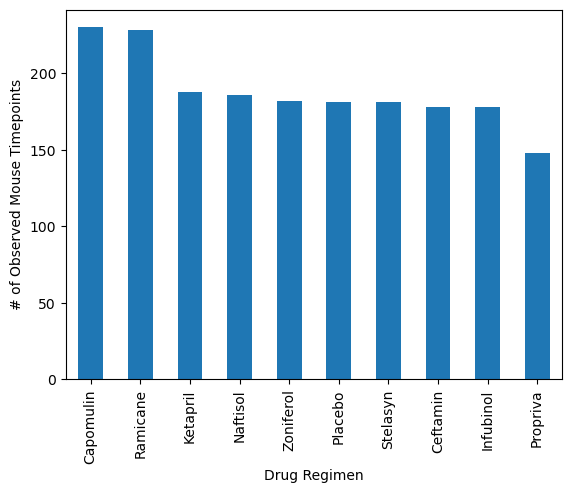

In [16]:
bar_chart1.plot(kind="bar",x="Drug Regimen",ylabel = "# of Observed Mouse Timepoints")

plt.show()

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = list(grouped_regimen["Timepoint"].count().sort_values(ascending=False).keys())
x_axis

['Capomulin',
 'Ramicane',
 'Ketapril',
 'Naftisol',
 'Zoniferol',
 'Placebo',
 'Stelasyn',
 'Ceftamin',
 'Infubinol',
 'Propriva']

In [18]:
y_axis = list(grouped_regimen["Timepoint"].count().sort_values(ascending=False).values)
y_axis

[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

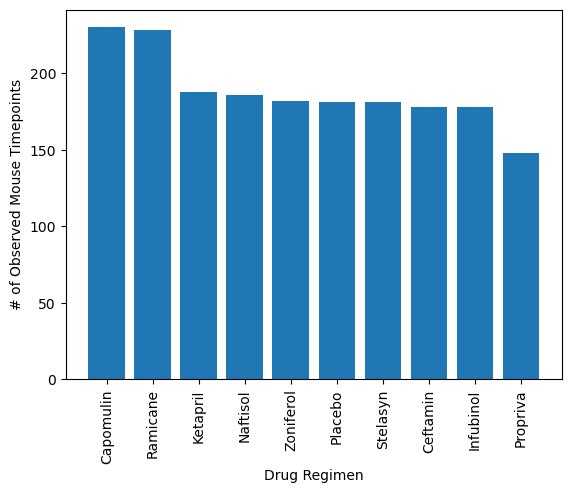

In [19]:
fig = plt.figure()
plt.bar(x_axis,y_axis)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
id_grouped = clean_data.groupby(["Mouse ID"])
sex_count_df = pd.DataFrame(id_grouped["Sex"].value_counts())
sex_count_df.rename(columns={"Sex":"Sex Occurances"},inplace=True)
sex_count_df.reset_index(level="Sex",inplace=True)
sex_count_df = pd.DataFrame(sex_count_df)
sex_count_df

Sex  Sex Occurances
Mouse ID                        
a203      Female              10
a251      Female              10
a262      Female              10
a275      Female              10
a366      Female               7
...          ...             ...
z435      Female               3
z578        Male              10
z581      Female              10
z795      Female              10
z969        Male              10

[248 rows x 2 columns]

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count_df = sex_count_df["Sex"].value_counts()
sex_count_df

Male      125
Female    123
Name: Sex, dtype: int64

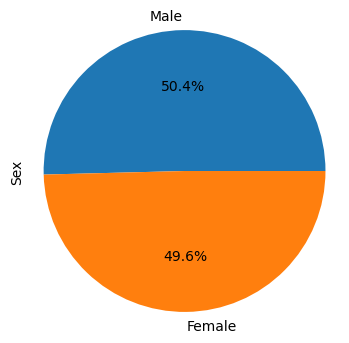

In [22]:
pie_chart1 = sex_count_df.plot(kind="pie", y=["Sex"],figsize=(4,4),autopct="%1.1f%%")
plt.axis("equal")
plt.show()

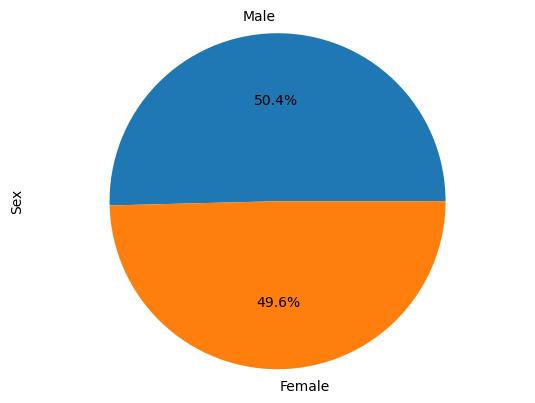

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count_df,labels=["Male","Female"],autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
clean_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [25]:
id_grouped.tail(3)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
7        b128         35           37.967644                 1    Capomulin   
8        b128         40           38.379726                 2    Capomulin   
9        b128         45           38.982878                 2    Capomulin   
10       f932          0           45.000000                 0     Ketapril   
16       g107         25           64.663626                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1881     f966         15           32.623003                 0    Capomulin   
1882     f966         20           30.485985                 0    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
7     Female           9          22  
8     Female           9          22  
9     Female           9          22  
10      Male          15          29  
16    Female           2          29  
...      ...         ...         ...  
1881    Male          16          17  
1882    Male          16          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[705 rows x 8 columns]

In [26]:
clean_data['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = id_grouped["Timepoint"].max()
final_tumor_volume.head(3)

Mouse ID
a203    45
a251    45
a262    45
Name: Timepoint, dtype: int64

In [28]:
final_tumor_volume_df = pd.DataFrame(final_tumor_volume).reset_index()
final_tumor_volume_df

Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]

In [29]:
final_tumor_volume_df.shape

(248, 2)

In [30]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_merged = pd.merge(final_tumor_volume_df,clean_data,on=["Mouse ID","Timepoint"],how="left")
final_tumor_volume_merged_renamed_df = final_tumor_volume_merged.rename(columns={"Tumor Volume (mm3)" : "Final Tumor Volume (mm3)"})
final_tumor_volume_merged_renamed_df

Mouse ID  Timepoint  Final Tumor Volume (mm3)  Metastatic Sites  \
0       a203         45                 67.973419                 2   
1       a251         45                 65.525743                 1   
2       a262         45                 70.717621                 4   
3       a275         45                 62.999356                 3   
4       a366         30                 63.440686                 1   
..       ...        ...                       ...               ...   
243     z435         10                 48.710661                 0   
244     z578         45                 30.638696                 0   
245     z581         45                 62.754451                 3   
246     z795         45                 65.741070                 3   
247     z969         45                 73.867845                 4   

    Drug Regimen     Sex  Age_months  Weight (g)  
0      Infubinol  Female          20          23  
1      Infubinol  Female          21          25  
2        Placebo  Female          17          29  
3       Ceftamin  Female          20          28  
4       Stelasyn  Female          16          29  
..           ...     ...         ...         ...  
243     Propriva  Female          12          26  
244     Ramicane    Male          11          16  
245    Infubinol  Female          24          25  
246     Naftisol  Female          13          29  
247     Naftisol    Male           9          30  

[248 rows x 8 columns]

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
final_tumor_volume_4_treatments = final_tumor_volume_merged_renamed_df.loc[
    (final_tumor_volume_merged_renamed_df["Drug Regimen"]=="Capomulin")
    |(final_tumor_volume_merged_renamed_df["Drug Regimen"]=="Ramicane")
    |(final_tumor_volume_merged_renamed_df["Drug Regimen"]=="Infubinol")
    |(final_tumor_volume_merged_renamed_df["Drug Regimen"]=="Ceftamin"),:]
final_tumor_volume_4_treatments

Mouse ID  Timepoint  Final Tumor Volume (mm3)  Metastatic Sites  \
0       a203         45                 67.973419                 2   
1       a251         45                 65.525743                 1   
3       a275         45                 62.999356                 3   
6       a411         45                 38.407618                 1   
7       a444         45                 43.047543                 0   
..       ...        ...                       ...               ...   
238     y769         45                 68.594745                 4   
239     y793         45                 31.896238                 2   
240     y865         45                 64.729837                 3   
244     z578         45                 30.638696                 0   
245     z581         45                 62.754451                 3   

    Drug Regimen     Sex  Age_months  Weight (g)  
0      Infubinol  Female          20          23  
1      Infubinol  Female          21          25  
3       Ceftamin  Female          20          28  
6       Ramicane    Male           3          22  
7       Ramicane  Female          10          25  
..           ...     ...         ...         ...  
238     Ceftamin  Female           6          27  
239    Capomulin    Male          17          17  
240     Ceftamin    Male          23          26  
244     Ramicane    Male          11          16  
245    Infubinol  Female          24          25  

[100 rows x 8 columns]

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [33]:
for x in treatments:
    print(x)

Capomulin
Ramicane
Infubinol
Ceftamin


In [34]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [35]:
# Finding quartiles per each regimen of 4 drug regimens
quartiles = final_tumor_volume_4_treatments.groupby(["Drug Regimen"])["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles

Drug Regimen      
Capomulin     0.25    32.377357
              0.50    38.125164
              0.75    40.159220
Ceftamin      0.25    48.722078
              0.50    59.851956
              0.75    64.299830
Infubinol     0.25    54.048608
              0.50    60.165180
              0.75    65.525743
Ramicane      0.25    31.560470
              0.50    36.561652
              0.75    40.659006
Name: Final Tumor Volume (mm3), dtype: float64

In [36]:
quartiles.info

<bound method Series.info of Drug Regimen      
Capomulin     0.25    32.377357
              0.50    38.125164
              0.75    40.159220
Ceftamin      0.25    48.722078
              0.50    59.851956
              0.75    64.299830
Infubinol     0.25    54.048608
              0.50    60.165180
              0.75    65.525743
Ramicane      0.25    31.560470
              0.50    36.561652
              0.75    40.659006
Name: Final Tumor Volume (mm3), dtype: float64>

In [37]:
final_tumor_volume_4_treatments_grouped = final_tumor_volume_4_treatments.groupby(["Drug Regimen"])
final_tumor_volume_4_treatments_grouped.head(2)

Mouse ID  Timepoint  Final Tumor Volume (mm3)  Metastatic Sites  \
0      a203         45                 67.973419                 2   
1      a251         45                 65.525743                 1   
3      a275         45                 62.999356                 3   
6      a411         45                 38.407618                 1   
7      a444         45                 43.047543                 0   
19     b128         45                 38.982878                 2   
21     b447          0                 45.000000                 0   
24     b742         45                 38.939633                 0   

   Drug Regimen     Sex  Age_months  Weight (g)  
0     Infubinol  Female          20          23  
1     Infubinol  Female          21          25  
3      Ceftamin  Female          20          28  
6      Ramicane    Male           3          22  
7      Ramicane  Female          10          25  
19    Capomulin  Female           9          22  
21     Ceftamin    Male           2          30  
24    Capomulin    Male           7          21

In [38]:
final_tumor_volume_x_treatment = final_tumor_volume_4_treatments.loc[final_tumor_volume_4_treatments["Drug Regimen"]== "Infubinol",
                                                                         ["Final Tumor Volume (mm3)"]]
quartiles2 = final_tumor_volume_x_treatment.quantile([.25,.5,.75])
quartiles2

Final Tumor Volume (mm3)
0.25                 54.048608
0.50                 60.165180
0.75                 65.525743

In [39]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds

for x in treatments:
    final_tumor_volume_x_treatment = final_tumor_volume_4_treatments.loc[final_tumor_volume_4_treatments["Drug Regimen"]== x,
                                                                         ["Final Tumor Volume (mm3)"]]
    quartiles = final_tumor_volume_x_treatment.quantile([.25,.5,.75])
    lowerq = quartiles['Final Tumor Volume (mm3)'][0.25]
    upperq = quartiles['Final Tumor Volume (mm3)'][0.75]

    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_volume_x_treatment.loc[(final_tumor_volume_4_treatments["Final Tumor Volume (mm3)"]>upper_bound)
                                                  |(final_tumor_volume_4_treatments["Final Tumor Volume (mm3)"]<lower_bound),
                                                  ["Final Tumor Volume (mm3)"]]
    
    print(f"{x}'s interquartile range (IQR) is {iqr}")
    print(f"{x}'s potential outliers: {outliers}")

Capomulin's interquartile range (IQR) is 7.781863460000004
Capomulin's potential outliers: Empty DataFrame
Columns: [Final Tumor Volume (mm3)]
Index: []
Ramicane's interquartile range (IQR) is 9.098536719999998
Ramicane's potential outliers: Empty DataFrame
Columns: [Final Tumor Volume (mm3)]
Index: []
Infubinol's interquartile range (IQR) is 11.477135160000003
Infubinol's potential outliers:     Final Tumor Volume (mm3)
31                 36.321346
Ceftamin's interquartile range (IQR) is 15.577752179999997
Ceftamin's potential outliers: Empty DataFrame
Columns: [Final Tumor Volume (mm3)]
Index: []


In [40]:
# creating series for each drug
tumor_vol_data = pd.DataFrame(columns=["Capomulin","Ramicane","Infubinol","Ceftamin"])
for x in treatments:
    final_tumor_volume_x_treatment = final_tumor_volume_4_treatments.loc[final_tumor_volume_4_treatments["Drug Regimen"]== x,
                                                                         ["Final Tumor Volume (mm3)"]]
    if x == "Capomulin":
        tumor_vol_data_Capomulin = final_tumor_volume_x_treatment
    elif x == "Ramicane":
        tumor_vol_data_Ramicane = final_tumor_volume_x_treatment
    elif x == "Infubinol":
        tumor_vol_data_Infubinol = final_tumor_volume_x_treatment
    else:
        tumor_vol_data_Ceftamin = final_tumor_volume_x_treatment
        
tumor_vol_data_Ceftamin["Final Tumor Volume (mm3)"].count()

25

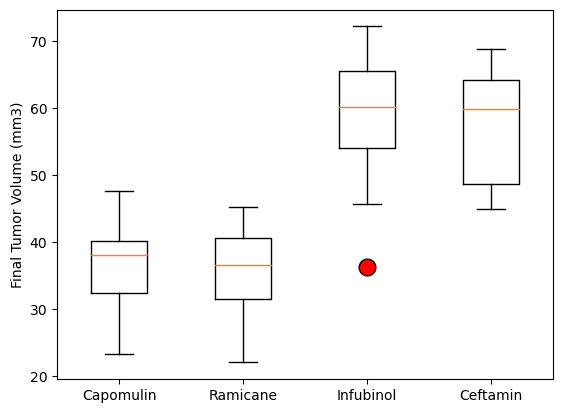

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot([tumor_vol_data_Capomulin["Final Tumor Volume (mm3)"],tumor_vol_data_Ramicane["Final Tumor Volume (mm3)"],
            tumor_vol_data_Infubinol["Final Tumor Volume (mm3)"],tumor_vol_data_Ceftamin["Final Tumor Volume (mm3)"]],
            flierprops=dict(markerfacecolor = "red", markersize = 12))

plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

In [42]:
id_grouped.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1883     m601          0           45.000000                 0    Capomulin   
1884     m601          5           41.408591                 1    Capomulin   
1885     m601         10           36.825367                 1    Capomulin   
1886     m601         15           35.464612                 1    Capomulin   
1887     m601         20           34.255732                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1883    Male          22          17  
1884    Male          22          17  
1885    Male          22          17  
1886    Male          22          17  
1887    Male          22          17  

[1103 rows x 8 columns]

In [43]:
# I509 id_grouped["Mouse ID"]
# 'I509' in id_grouped["Mouse ID"]

for values in clean_data["Mouse ID"]:
    if values == 'i509':
        print(True)


In [44]:
for values in clean_data["Mouse ID"]:
    if values == 'l509':
        print(True)


True
True
True
True
True
True
True
True
True
True


In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = clean_data.loc[(clean_data["Mouse ID"] == "l509"),:]
single_mouse

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1721     l509          0           45.000000                 0    Capomulin   
1722     l509          5           45.851193                 0    Capomulin   
1723     l509         10           46.759074                 0    Capomulin   
1724     l509         15           47.488599                 1    Capomulin   
1725     l509         20           48.070452                 2    Capomulin   
1726     l509         25           44.006257                 2    Capomulin   
1727     l509         30           44.708055                 2    Capomulin   
1728     l509         35           40.207288                 2    Capomulin   
1729     l509         40           40.770813                 2    Capomulin   
1730     l509         45           41.483008                 3    Capomulin   

       Sex  Age_months  Weight (g)  
1721  Male          17          21  
1722  Male          17          21  
1723  Male          17          21  
1724  Male          17          21  
1725  Male          17          21  
1726  Male          17          21  
1727  Male          17          21  
1728  Male          17          21  
1729  Male          17          21  
1730  Male          17          21

In [46]:
x_axis = single_mouse["Timepoint"].values
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [47]:
y_axis = single_mouse["Tumor Volume (mm3)"].values
y_axis

array([45.        , 45.85119285, 46.75907363, 47.48859931, 48.07045162,
       44.00625702, 44.70805473, 40.2072885 , 40.77081259, 41.48300765])

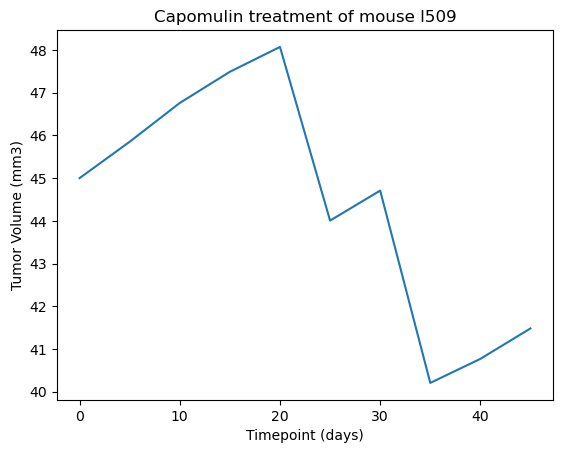

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.plot(x_axis, y_axis)
plt.show()

In [49]:
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Capomulin_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[230 rows x 8 columns]

In [50]:
id_grouped_Capomulin = Capomulin_data.groupby(["Mouse ID"])[["Tumor Volume (mm3)","Weight (g)"]].mean()
id_grouped_Capomulin

Tumor Volume (mm3)  Weight (g)
Mouse ID                                
b128               41.963636        22.0
b742               40.083699        21.0
f966               36.505973        17.0
g288               41.990097        19.0
g316               44.613344        22.0
i557               44.805810        24.0
i738               39.141053        20.0
j119               44.465236        23.0
j246               43.216925        21.0
l509               44.434474        21.0
l897               42.507261        19.0
m601               34.847470        17.0
m957               39.049816        19.0
r157               45.798970        25.0
r554               36.509212        17.0
r944               43.367364        25.0
s185               34.559143        17.0
s710               42.803733        23.0
t565               39.328725        17.0
u364               39.887495        17.0
v923               41.581595        21.0
w150               41.384825        23.0
w914               41.352452        21.0
x401               36.182040        15.0
y793               38.506829        17.0

In [51]:
id_grouped_Capomulin.dtypes

Tumor Volume (mm3)    float64
Weight (g)            float64
dtype: object

In [52]:
id_grouped_Capomulin.info

<bound method DataFrame.info of           Tumor Volume (mm3)  Weight (g)
Mouse ID                                
b128               41.963636        22.0
b742               40.083699        21.0
f966               36.505973        17.0
g288               41.990097        19.0
g316               44.613344        22.0
i557               44.805810        24.0
i738               39.141053        20.0
j119               44.465236        23.0
j246               43.216925        21.0
l509               44.434474        21.0
l897               42.507261        19.0
m601               34.847470        17.0
m957               39.049816        19.0
r157               45.798970        25.0
r554               36.509212        17.0
r944               43.367364        25.0
s185               34.559143        17.0
s710               42.803733        23.0
t565               39.328725        17.0
u364               39.887495        17.0
v923               41.581595        21.0
w150               41.384

In [53]:
id_grouped_Capomulin["Tumor Volume (mm3)"].values

array([41.96363563, 40.0836993 , 36.50597276, 41.99009661, 44.6133439 ,
       44.80580968, 39.14105275, 44.46523635, 43.21692461, 44.43447379,
       42.50726103, 34.8474699 , 39.04981645, 45.79896951, 36.50921205,
       43.36736445, 34.55914339, 42.80373304, 39.3287251 , 39.88749519,
       41.5815951 , 41.38482521, 41.35245228, 36.18203956, 38.50682925])

In [54]:
id_grouped_Capomulin["Weight (g)"].values

array([22., 21., 17., 19., 22., 24., 20., 23., 21., 21., 19., 17., 19.,
       25., 17., 25., 17., 23., 17., 17., 21., 23., 21., 15., 17.])

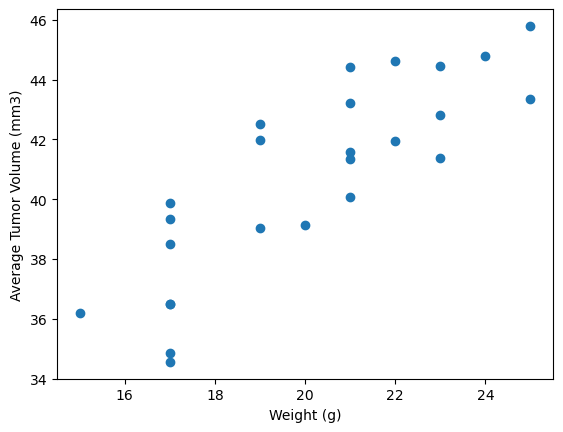

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_values = id_grouped_Capomulin["Weight (g)"].values
y_values = id_grouped_Capomulin["Tumor Volume (mm3)"].values

plt.scatter(x_values,y_values)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [56]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.84


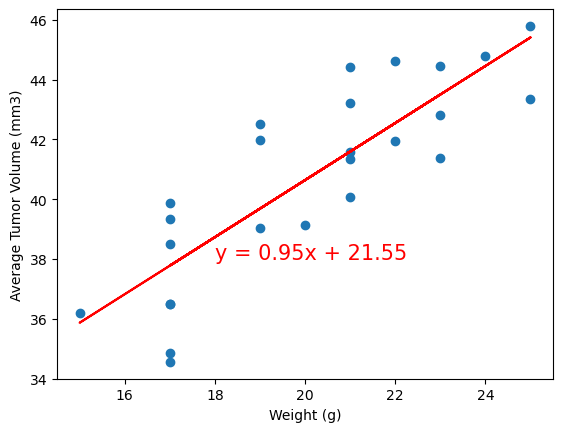

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(18,38),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()